In [1]:
# Test if the page source can be successfully retrieved.
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time  

chrome_options = Options()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(options=chrome_options)

url = "https://coinmarketcap.com/"
driver.get(url)

time.sleep(10)  

# Extract the raw HTML source
page_source = driver.page_source

# Print the page source
if page_source:
    print("Page source successfully extracted!")
    print(page_source) 
else:
    print("Failed to extract page source.")

driver.quit()

Page source successfully extracted!
<html lang="en" dir="ltr"><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no"><meta property="og:url" content="https://coinmarketcap.com/"><link rel="canonical" href="https://coinmarketcap.com/"><link rel="alternate" hreflang="ar" href="https://coinmarketcap.com/ar/"><link rel="alternate" hreflang="bg" href="https://coinmarketcap.com/bg/"><link rel="alternate" hreflang="cs" href="https://coinmarketcap.com/cs/"><link rel="alternate" hreflang="da" href="https://coinmarketcap.com/da/"><link rel="alternate" hreflang="de" href="https://coinmarketcap.com/de/"><link rel="alternate" hreflang="el" href="https://coinmarketcap.com/el/"><link rel="alternate" hreflang="en" href="https://coinmarketcap.com/"><link rel="alternate" hreflang="es" href="https://coinmarketcap.com/es/"><link rel="alternate" hreflang="fi" hr

In [2]:
#  Extract structured data (name and link) from multiple pages
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from bs4 import BeautifulSoup

chrome_options = Options()
chrome_options.add_argument('--headless') 

driver = webdriver.Chrome(options=chrome_options)
url = "https://coinmarketcap.com/"
x=["","?page="]
crypto_data = []
for i in range(1,11):
    if i==0:
        url1=url+x[0]
    else :
        url1=url+x[1]+str(i)
    driver.get(url1)

    wait = WebDriverWait(driver, 10)
    wait.until(ec.presence_of_element_located((By.CLASS_NAME, "sc-936354b2-3")))

    # page source
    page_source = driver.page_source

    #  parse the HTML
    soup = BeautifulSoup(page_source, 'html.parser')

    # cryptocurrency information
    crypto_elements = soup.find_all('a', class_='cmc-link')

    # names and links
    for element in crypto_elements:
        name_element = element.find('span')
        link_element = element.get('href')
        

        if name_element and link_element:
            crypto_data.append({
            'name': name_element.text.strip(),
            'link': link_element
            })

for index, data in enumerate(crypto_data):
    print(f"{index + 1}. Name: {data['name']}, Link: {data['link']}")

driver.quit()

1. Name: , Link: /currencies/stellar/
2. Name: , Link: /currencies/shiba-inu/
3. Name: , Link: /currencies/sui/
4. Name: , Link: /currencies/hedera/
5. Name: , Link: /currencies/polkadot-new/
6. Name: , Link: /currencies/bitcoin-cash/
7. Name: , Link: /currencies/pepe/
8. Name: , Link: /currencies/uniswap/
9. Name: , Link: /currencies/unus-sed-leo/
10. Name: , Link: /currencies/litecoin/
11. Name: , Link: /currencies/hyperliquid/
12. Name: , Link: /currencies/bitget-token-new/
13. Name: , Link: /currencies/near-protocol/
14. Name: , Link: /currencies/ethena-usde/
15. Name: , Link: /currencies/multi-collateral-dai/
16. Name: , Link: /currencies/internet-computer/
17. Name: , Link: /currencies/aptos/
18. Name: , Link: /currencies/aave/
19. Name: , Link: /currencies/mantle/
20. Name: , Link: /currencies/virtual-protocol/
21. Name: , Link: /currencies/polygon-ecosystem-token/
22. Name: , Link: /currencies/cronos/
23. Name: , Link: /currencies/ethereum-classic/
24. Name: , Link: /currencies

In [3]:
#  Expand data collection with more detailed financial metrics for each cryptocurrency.
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from bs4 import BeautifulSoup

# Set up Chrome options for headless browsing
chrome_options = Options()
chrome_options.add_argument('--headless')

# Initialize the Chrome WebDriver
browser = webdriver.Chrome(options=chrome_options)

# Base URL of CoinMarketCap
base_url = "https://coinmarketcap.com/"
pagination_params = ["", "?page="]
crypto_details = []

# Loop through pages 1 to 10
for page_number in range(1, 11):
    if page_number == 0:
        full_url = base_url + pagination_params[0]
    else:
        full_url = base_url + pagination_params[1] + str(page_number)
    
    browser.get(full_url)

    # Wait until the page is fully loaded
    wait = WebDriverWait(browser, 10)
    wait.until(ec.presence_of_element_located((By.CLASS_NAME, "sc-936354b2-3")))

    # Get the page's HTML source
    html_source = browser.page_source

    # Parse the HTML
    soup = BeautifulSoup(html_source, 'html.parser')

    # Extract cryptocurrency information
    crypto_links = soup.find_all('a', class_='cmc-link')
    market_cap_elements = soup.find_all('span', class_='sc-71024e3e-0')
    daily_change_elements = soup.find_all('span', class_='sc-a59753b0-0')

    for crypto in crypto_links:
        name_tag = crypto.find('span')
        link_tag = crypto.get('href')
        market_cap_tag = crypto.find('span', class_='sc-71024e3e-0')
        daily_change_tag = crypto.find('span', class_='sc-a59753b0-0')
        
        if name_tag and link_tag and market_cap_tag and daily_change_tag:
            market_cap = market_cap_tag.text.strip() if market_cap_tag else 'N/A'
            daily_change = daily_change_tag.text.strip() if daily_change_tag else 'N/A'
            
            crypto_details.append({
                'name': name_tag.text.strip(),
                'link': link_tag,
                'market_cap': market_cap,
                'daily_change': daily_change
            })

# Print the extracted details
for index, crypto in enumerate(crypto_details):
    print(f"{index + 1}. Name: {crypto['name']}, Link: {crypto['link']}, Market Cap: {crypto['market_cap']}, Daily Change: {crypto['daily_change']}")

# Close the browser
browser.quit()

In [4]:
# Retrieve real-time price data for a specific cryptocurrency from Binance's API
import requests

def get_binance_ticker_price():
    # Replace these placeholders with your actual Binance API details
    api_key='driaBQg3PSsqotcuKgC9WqeDTmOjp59eGKLOo88pGevkfNyer2Ig3eHMwaqJwMp9'
    api_secret='knnNZrCiVmbRY9iMIntL0x9plTUbpe5EzGSOsSahvQj998E8xCxuTUcVsWECo73Q'
    symbol = 'GRTUSDT'  # Replace with the desired trading pair

    # Binance API endpoint for ticker price
    api_url = 'https://api.binance.com/api/v3/ticker/price'

    # Parameters for the API call
    params = {
        'symbol': symbol,
    }

    # Make the API request
    response = requests.get(api_url, params=params, headers={'X-MBX-APIKEY': api_key})

    if response.status_code == 200:
        data = response.json()
        current_price = data['price']
        # The GRTUSDT pair price indicates how much USDT is required to purchase 1 GRT.
        print(f'Current Price of {symbol}: {current_price}')

    else:
        print(f"Error {response.status_code}: {response.text}")

# Call the function
get_binance_ticker_price()

Current Price of GRTUSDT: 0.21860000


In [5]:
import pandas as pd 
crypto_df = pd.DataFrame(crypto_data)
#data cleaning 
print(crypto_df.shape)

# Remove the general market sentiment
for index,row in crypto_df.iterrows():
    if row['link']=='/charts/#fear-and-greed-index':
        crypto_df.drop(index, inplace=True)
    
for index,row in crypto_df.iterrows():
    if "#markets" in row['link']:
        crypto_df["link"].iloc[index].replace("#markets", "")

print(crypto_df.shape)
        
for index,row in crypto_df.iterrows():
    link = row['link'] 
    name = link.split("/currencies/")[1][:-1]
    name=name.replace("-"," ")
    crypto_df.at[index, 'name'] = name
    crypto_df.at[index, 'link'] = f"https://coinmarketcap.com/{link}"
    crypto_df['link'] = crypto_df['link'].str.replace('//currencies/', '/currencies/')

(870, 2)
(870, 2)


In [7]:
print(crypto_df.sample(10))

                   name                                               link
386               propy        https://coinmarketcap.com/currencies/propy/
789      pstake finance  https://coinmarketcap.com/currencies/pstake-fi...
250            metaplex     https://coinmarketcap.com/currencies/metaplex/
52            floki inu    https://coinmarketcap.com/currencies/floki-inu/
595               major        https://coinmarketcap.com/currencies/major/
782  guild of guardians  https://coinmarketcap.com/currencies/guild-of-...
242        elixir deusd  https://coinmarketcap.com/currencies/elixir-de...
105               ecash        https://coinmarketcap.com/currencies/ecash/
606             bluefin      https://coinmarketcap.com/currencies/bluefin/
611      dione protocol  https://coinmarketcap.com/currencies/dione-pro...


In [9]:
# Fail to extract the right links
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
import time

def setup_driver():
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    return webdriver.Chrome(options=options)

def extract_explorer_links(url):
    driver = setup_driver()
    try:
        driver.get(url)
        wait = WebDriverWait(driver, 10)
        
        # Find and click the chevron/more button using various possible selectors
        more_button = None
        selectors = [
            "div[data-test='chip-more-explorer-links']",
            "div[class*='ShowcaseWithMore_more-action-chip']",
            "//div[contains(@class, 'InfoBarItem_base') and .//div[contains(text(), 'Explorers')]]//div[contains(@class, 'BaseChip_only-icon')]"
        ]
        
        for selector in selectors:
            try:
                if selector.startswith("//"):
                    more_button = wait.until(EC.element_to_be_clickable((By.XPATH, selector)))
                else:
                    more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, selector)))
                break
            except:
                continue
        
        if more_button:
            # Try both click and hover actions
            try:
                more_button.click()
            except:
                actions = ActionChains(driver)
                actions.move_to_element(more_button).perform()
            
            time.sleep(2)  # Wait for modal to appear
            
            # Find all explorer links in the modal
            explorer_dict = {}
            modal_links = wait.until(EC.presence_of_all_elements_located((
                By.CSS_SELECTOR, "div[class*='Popover_popover-content'] a"
            )))
            
            for link in modal_links:
                try:
                    # Extract text from the LongTextDisplay div
                    name = link.find_element(
                        By.CSS_SELECTOR, 
                        "div[class*='LongTextDisplay_content-wrapper']"
                    ).text.strip()
                    
                    href = link.get_attribute('href')
                    if name and href:
                        explorer_dict[name] = href
                except:
                    continue
            
            return explorer_dict
        else:
            print(f"Could not find more button for {url}")
            return {}

    except Exception as e:
        print(f"Error processing {url}: {e}")
        return {}
    finally:
        driver.quit()

def process_crypto_data(df):
    # Add new networks column
    df['networks'] = None
    
    # Process each row
    for index, row in df.iterrows():
        print(f"Processing row {index + 1}/{len(df)}")
        explorer_dict = extract_explorer_links(row['link'])
        df.at[index, 'networks'] = explorer_dict
        time.sleep(1)  # Polite delay between requests
    
    return df

# Example usage
if __name__ == "__main__":
    # Assuming crypto_df has 'name' and 'link' columns
    result_df = process_crypto_data(crypto_df)
    
    # Print results
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    print("\nResults:")
    print(result_df)
    
    # Optional: Save to CSV
    # result_df.to_csv('crypto_with_networks.csv', index=False)

Processing row 1/870
Processing row 2/870


KeyboardInterrupt: 

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><script type="application/ld+json">{"@context":"https://schema.org/","@type":"Product","name":"Dogecoin","aggregateRating":{"@type":"AggregateRating","ratingValue":4,"bestRating":5,"ratingCount":3,"itemReviewed":""}}</script><meta content="https://coinmarketcap.com/currencies/dogecoin/" property="og:url"/><link href="https://coinmarketcap.com/currencies/dogecoin/" rel="canonical"/><link href="https://coinmarketcap.com/ar/currencies/dogecoin/" hreflang="ar" rel="alternate"/><link href="https://coinmarketcap.com/bg/currencies/dogecoin/" hreflang="bg" rel="alternate"/><link href="https://coinmarketcap.com/cs/currencies/dogecoin/" hreflang="cs" rel="alternate"/><link href="https://coinmarketcap.com/da/cu
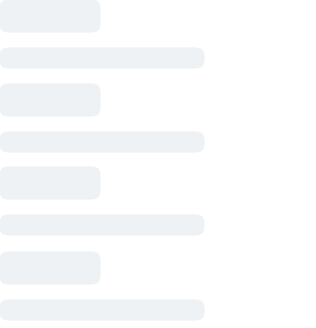

In [12]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

# Initialize a UserAgent object
user_agent = UserAgent()

# Set headers with a random user agent
headers = {'User-Agent': user_agent.random}

# URL to scrape
url = "https://coinmarketcap.com/currencies/dogecoin/"

# Send a GET request to the URL
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)
    # Extract links based on class
    elements = soup.find_all('div', class_='sc-65e7f566-0 clXVKn InfoBarItem_base__tan4P')

    # Extract links from each element
    links = []
    for element in elements:
        a_tags = element.find_all('a', {'target': '_blank'})
        links.extend([a['href'] for a in a_tags])

    # Print the extracted links
    print(links)
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

In [14]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

def scrape_network_links(url):
    # Initialize a UserAgent object
    user_agent = UserAgent()

    # Set headers with a random user agent
    headers = {'User-Agent': user_agent.random}

    # Send a GET request to the URL
    response = requests.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract links based on class
        elements = soup.find_all('div', class_='ssc-65e7f566-0 clXVKn InfoBarItem_base__tan4P')

        # Extract links from each element
        links = []
        for element in elements:
            a_tags = element.find_all('a', {'target': '_blank'})
            links.extend([a['href'] for a in a_tags])

        # Extract text between specific markers
        page_source = str(soup)

        explorer_start = '"explorer":['
        explorer_end = '],"message_board":['

        start_index = page_source.find(explorer_start) + len(explorer_start)
        end_index = page_source.find(explorer_end)

        explorer_text = page_source[start_index:end_index]

        # Split the explorer_text into a list of links
        explorer_links = explorer_text.split(',')

        # Create a dictionary to store cleaned links with network names
        cleaned_links_dict = {}

        # Extract the cleaned explorer links
        for i, explorer_link in enumerate(explorer_links):
            cleaned_link = explorer_link.strip().strip('[]"')

            # Exclude links starting with "https://github.com/"
            if i == len(explorer_links) - 1:
                cleaned_link = cleaned_link.replace('source_code":["', '')
            
            # Exclude links starting with "https://github.com/"
            if not cleaned_link.startswith("https://github.com/"):
                # Extract network name from the link
                network_name = cleaned_link.split('//')[-1].split('.')[0]
                cleaned_links_dict[network_name] = cleaned_link

        return cleaned_links_dict

    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None
    
    
l=[]
i=0
for index, row in crypto_df.iterrows():
    url = row['link']
    result = scrape_network_links(url)
    l=l+[result]
    print(result)

# Assuming 'result' is a dictionary
df_list = pd.DataFrame(l)

crypto_df = pd.concat([crypto_df, df_list], axis=1)

{'dashboard': 'https://dashboard.stellar.org/', 'stellar': 'https://stellar.expert/explorer/public/', 'steexp': 'https://steexp.com/', 'blockchair': 'https://blockchair.com/stellar'}
{'etherscan': 'https://etherscan.io/token/0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce', 'solscan': 'https://solscan.io/token/CiKu4eHsVrc1eueVQeHn7qhXTcVu95gSQmBpX4utjL9z', 'bscscan': 'https://bscscan.com/token/0xb1547683DA678f2e1F003A780143EC10Af8a832B', 'finder': 'https://finder.terra.money/mainnet/address/terra1huku2lecfjhq9d00k5a8dh73gw7dwe6vvuf2dd', 'www': 'https://www.okx.com/web3/explorer/eth/token/0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce', 'source_code":': 'source_code":'}
{'suiexplorer': 'https://suiexplorer.com/', 'suivision': 'https://suivision.xyz/', 'suiscan': 'https://suiscan.xyz/mainnet/home', 'www': 'https://www.okx.com/web3/explorer/sui'}
{'app': 'https://app.metrika.co/hedera/dashboard/network-overview?tr=1d', 'ledger': 'https://ledger.hashlog.io/', 'hashscan': 'https://hashscan.io/'}
{'p

AttributeError: 'NoneType' object has no attribute 'keys'

In [16]:
print(len(l))
i=0
for ll in l :
    print(ll)
    i+=1 
    if i ==200 :
        break

870
{'dashboard': 'https://dashboard.stellar.org/', 'stellar': 'https://stellar.expert/explorer/public/', 'steexp': 'https://steexp.com/', 'blockchair': 'https://blockchair.com/stellar'}
{'etherscan': 'https://etherscan.io/token/0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce', 'solscan': 'https://solscan.io/token/CiKu4eHsVrc1eueVQeHn7qhXTcVu95gSQmBpX4utjL9z', 'bscscan': 'https://bscscan.com/token/0xb1547683DA678f2e1F003A780143EC10Af8a832B', 'finder': 'https://finder.terra.money/mainnet/address/terra1huku2lecfjhq9d00k5a8dh73gw7dwe6vvuf2dd', 'www': 'https://www.okx.com/web3/explorer/eth/token/0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce', 'source_code":': 'source_code":'}
{'suiexplorer': 'https://suiexplorer.com/', 'suivision': 'https://suivision.xyz/', 'suiscan': 'https://suiscan.xyz/mainnet/home', 'www': 'https://www.okx.com/web3/explorer/sui'}
{'app': 'https://app.metrika.co/hedera/dashboard/network-overview?tr=1d', 'ledger': 'https://ledger.hashlog.io/', 'hashscan': 'https://hashscan.io/'}

In [17]:
from collections import Counter

flattened_links = [(key, value) for d in l if d is not None for key, value in d.items()]

# Count the occurrences of each title
title_counts = Counter(title for title, link in flattened_links)

# Sort the titles by count in descending order
sorted_titles = sorted(title_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted titles and counts
for title, count in sorted_titles:
    print(f"{title}: {count} links")


etherscan: 333 links
source_code":: 251 links
bscscan: 130 links
solscan: 120 links
www: 103 links
explorer: 100 links
ethplorer: 75 links
arbiscan: 39 links
basescan: 38 links
polygonscan: 31 links
: 18 links
blockchair: 17 links
nearblocks: 14 links
blockscout: 14 links
optimistic: 12 links
scan: 11 links
snowtrace: 10 links
avascan: 9 links
tronscan: 8 links
ftmscan: 7 links
finder: 6 links
suivision: 5 links
suiscan: 5 links
app: 5 links
eth: 5 links
tonviewer: 5 links
stellar: 4 links
hecoinfo: 4 links
explorer-mainnet: 4 links
ordiscan: 4 links
dashboard: 3 links
gitlab: 3 links
chainz: 3 links
vechainstats: 3 links
solana: 3 links
gnosisscan: 3 links
binplorer: 3 links
cardanoscan: 3 links
hashscan: 2 links
polkadot: 2 links
3xpl: 2 links
mantlescan: 2 links
atomscan: 2 links
bloks: 2 links
evm: 2 links
viewblock: 2 links
luncscan: 2 links
hubble: 2 links
kava: 2 links
andromeda-explorer: 2 links
github: 2 links
moonbeam: 2 links
bitbucket: 2 links
mainnet: 2 links
bigdipper: 2 